## Inferential Statistics

In [1]:
from scripts.read_data import load_dataset
from scripts.inferential_stats import chi_square_test
from scripts.inferential_stats import test_num_features
import warnings

In [2]:
df = load_dataset("Bank Customer Churn Prediction.csv")
df.columns = df.columns.str.lower().str.strip()


-- Chi-Square Test: gender vs churn --
Contigency Table:
churn      0     1
gender            
Female  3404  1139
Male    4559   898

Chi-Square Statistic: 112.9186
P-Value: 0.0000
Decision: Reject H-0 (dependent)

-- Chi-Square Test: country vs churn --
Contigency Table:
churn       0    1
country           
France   4204  810
Germany  1695  814
Spain    2064  413

Chi-Square Statistic: 301.2553
P-Value: 0.0000
Decision: Reject H-0 (dependent)

-- Chi-Square Test: credit_card vs churn --
Contigency Table:
churn           0     1
credit_card            
0            2332   613
1            5631  1424

Chi-Square Statistic: 0.4713
P-Value: 0.4924
Decision: Fail to reject H-0 (independent)

-- Chi-Square Test: active_member vs churn --
Contigency Table:
churn             0     1
active_member            
0              3547  1302
1              4416   735

Chi-Square Statistic: 242.9853
P-Value: 0.0000
Decision: Reject H-0 (dependent)


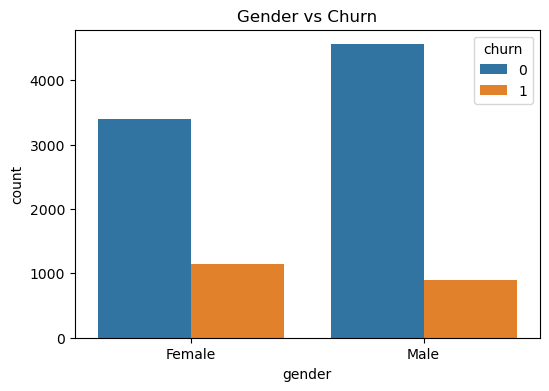

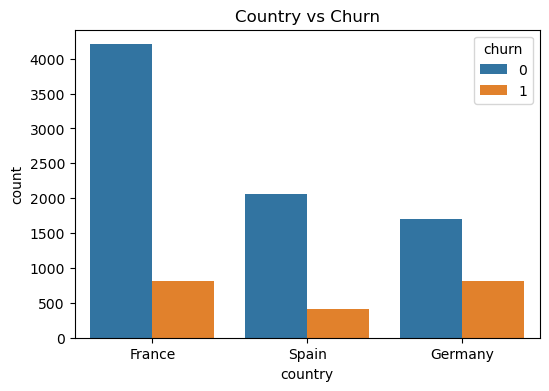

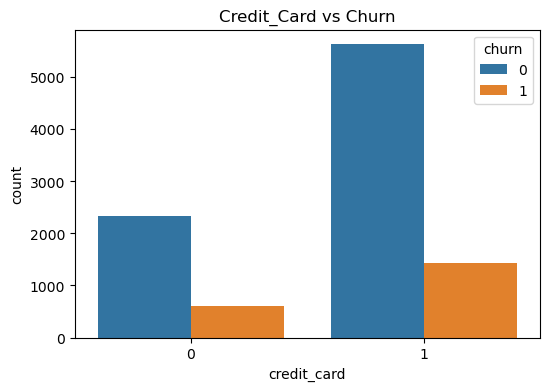

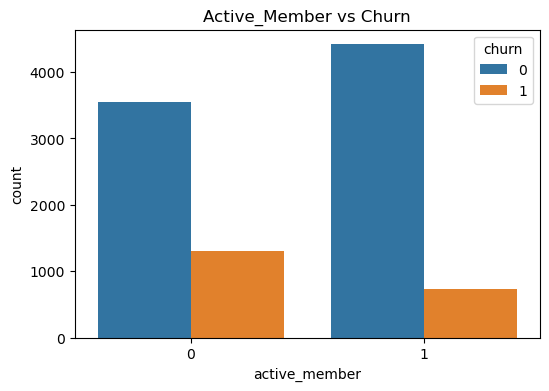

In [4]:
cat_features = ['gender', 'country', 'credit_card', 'active_member']

for feature in cat_features:
    chi_square_test(df, feature=feature,save_plot=True)

In [3]:
warnings.filterwarnings("ignore", message=".*scipy.stats.shapiro*")


-- Mann-Whitney U for age --
P-value: 0.0000
Reject H-0: Means are signigicantly different.


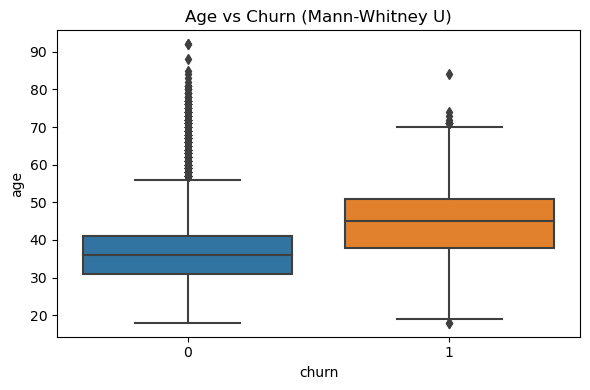


-- Mann-Whitney U for tenure --
P-value: 0.1622
Fail to reject H-0: No significant difference in distribution.


<Figure size 640x480 with 0 Axes>

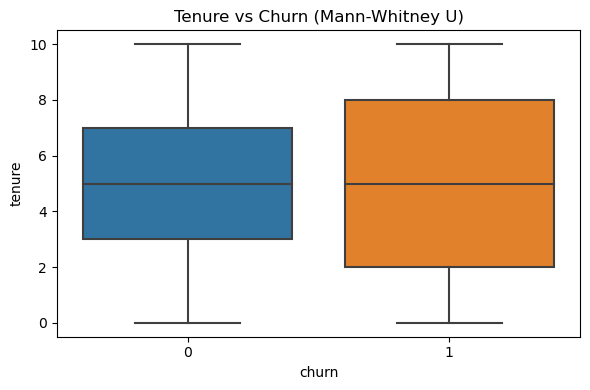


-- Mann-Whitney U for balance --
P-value: 0.0000
Reject H-0: Means are signigicantly different.


<Figure size 640x480 with 0 Axes>

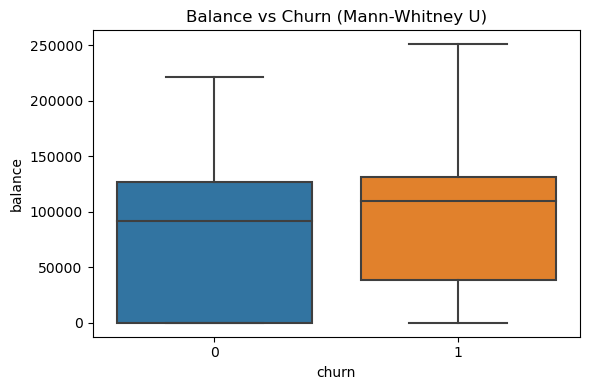


-- Mann-Whitney U for estimated_salary --
P-value: 0.2271
Fail to reject H-0: No significant difference in distribution.


<Figure size 640x480 with 0 Axes>

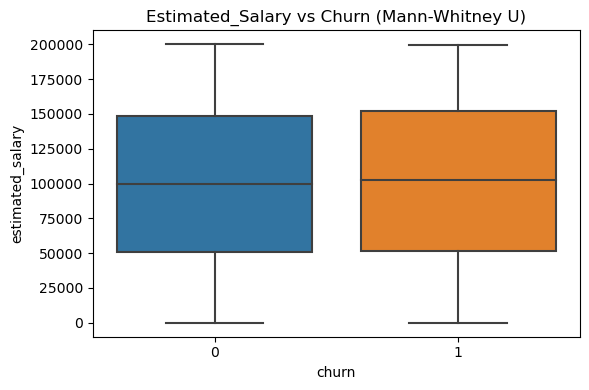


-- Mann-Whitney U for credit_score --
P-value: 0.0199
Reject H-0: Means are signigicantly different.


<Figure size 640x480 with 0 Axes>

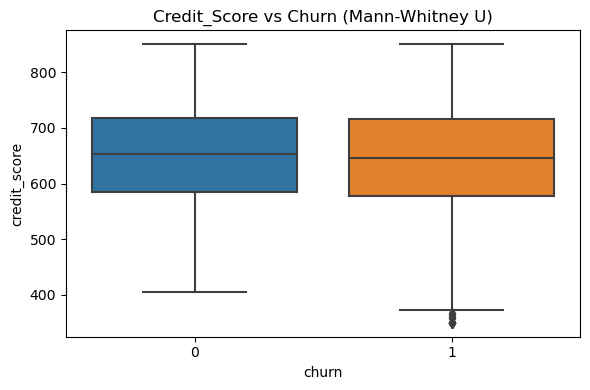

<Figure size 640x480 with 0 Axes>

In [6]:
num_features = ['age', 'tenure', 'balance', 'estimated_salary', 'credit_score']

for feature in num_features:
    test_num_features(df, feature=feature, save_plot=True)

#### Inferential Statistcs of Combined Features (Testing the feature combinations that were seen useful during the EDA phase)
1. **Age group and active membership**

In [4]:
# 3 age groups young(<30), middle(30-50), older(>50)

def create_age_group(age):
    if age < 30:
        return 'Young'
    elif age <= 50:
        return 'Middle'
    else:
        return 'Older'
    

ndf = df.copy()

ndf['age_group'] = ndf['age'].apply(create_age_group)

#Combining age_group with active memebrship
ndf['age_active_mem_comb'] = ndf['age_group'] + '_' + ndf['active_member'].map({1: 'Active', 0: 'Inactive'})



-- Chi-Square Test: age_active_mem_comb vs churn --
Contigency Table:
churn                   0    1
age_active_mem_comb           
Middle_Active        2990  488
Middle_Inactive      2758  862
Older_Active          634  202
Older_Inactive         64  361
Young_Active          792   45
Young_Inactive        725   79

Chi-Square Statistic: 1383.5680
P-Value: 0.0000
Decision: Reject H-0 (dependent)


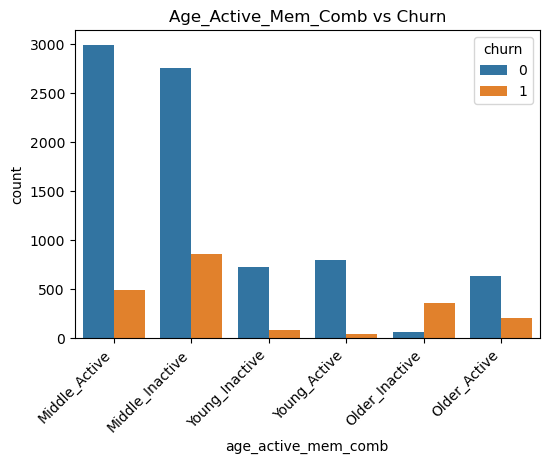

In [5]:
chi_square_test(ndf, feature='age_active_mem_comb', save_plot=True, rotate_x=True)

We can see that : 
- H-0 was rejected, so churn is dependent of this feature combination
- Older inactive cutomers churn a lot
- Middle inactive customers churn way more than the middle active ones
- Young active customers churn very little

2. **Balance level and tenure duration**

In [10]:
# balance = 0 (no balance), balance < 50000 (low balance), balance < 150000 
# (medium balance), balance > 150000 (High balance)

def bal_group(balance):
    if balance == 0:
        return 'No Balance'
    elif balance < 50000:
        return 'Low Balance'
    elif balance < 150000:
        return 'Medium Balance'
    else:
        return 'High Balance'
    
ndf['balance_group'] = ndf['balance'].apply(bal_group)

# tenure <= 2 (short period), tenure <= 5 (medium period), tenure > 5 (long tenure)

def ten_group(tenure):
    if tenure <= 2:
        return 'Short'
    elif tenure <= 5:
        return 'Medium'
    else:
        return 'Long'
    

ndf['tenure_group'] = df['tenure'].apply(ten_group)

In [11]:
#the interaction column
ndf['balance_tenure_comb'] = ndf['balance_group'] + '_' + ndf['tenure_group']


-- Chi-Square Test: balance_tenure_comb vs churn --
Contigency Table:
churn                     0    1
balance_tenure_comb             
High Balance_Long       326  102
High Balance_Medium     230   60
High Balance_Short      189   62
Low Balance_Long         23    9
Low Balance_Medium       13   10
Low Balance_Short        13    7
Medium Balance_Long    1815  565
Medium Balance_Medium  1196  406
Medium Balance_Short   1041  316
No Balance_Long        1446  208
No Balance_Medium       946  149
No Balance_Short        725  143

Chi-Square Statistic: 166.6263
P-Value: 0.0000
Decision: Reject H-0 (dependent)


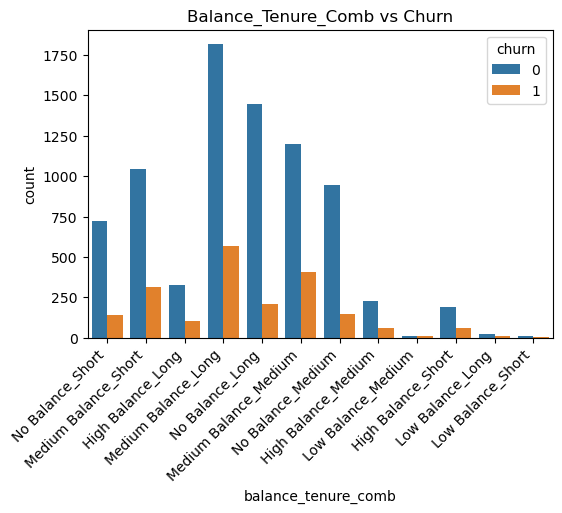

In [13]:
chi_square_test(ndf, feature='balance_tenure_comb', save_plot=True, rotate_x=True)

- Medium Balacne & Long Tenure : One of the highest churn counts overall (~23.7%).
- High Balance & Short Tenure : Even thoug the group is small, the churn rate is high (~24.7%).
- Low Balance & Short Tenure : Really small group, but the churn rate is high (7 out of 13 people churned) (~35%).
- No Balance & Medium Tenure : Lower churn rate combared to medium balance (~13.6%).


- It can be seen that churn is higher among medium to high balance and short/medium tenure.
- Customers with no balance and long tenure have the lowest churn. 
- Low balance customers churn more relative to their group size.

3. **Credit Card Ownership and Active Memebrship**
Since `credit_card` and `active_member` are both binary categorical features, these are the groups needed :

|**credit_card**|**active_member**|**Combination Label**|
|---------------|-----------------|---------------------|
|0|0|NoCard_Inactive|
|0|1|NoCard_Active|
|1|0|Card_Inactive|
|1|1|Card_Active|

In [14]:
ndf['cred_active_comb'] = ndf['credit_card'].map({0: 'NoCard', 1: 'Card'}) + '_' + ndf['active_member'].map({0: 'Inactive', 1: 'Active'})


-- Chi-Square Test: cred_active_comb vs churn --
Contigency Table:
churn                0    1
cred_active_comb           
Card_Active       3125  482
Card_Inactive     2506  942
NoCard_Active     1291  253
NoCard_Inactive   1041  360

Chi-Square Statistic: 251.4724
P-Value: 0.0000
Decision: Reject H-0 (dependent)


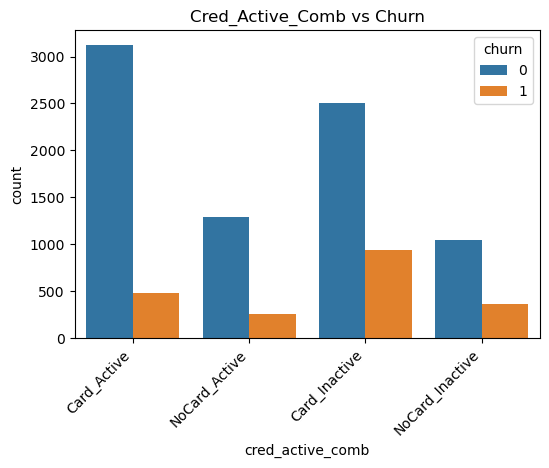

In [15]:
chi_square_test(ndf, feature='cred_active_comb', save_plot=True, rotate_x=True)

- Even though the H-0 was not rejected and this combination is dependant to churn, looking at the counts and the graph it can be seen that having a credit card does not make a big difference if the customers are already inactive.
- Among members that have a credit card being active reduces churn by a bit

4. Number of products owned and Activity
- `products_number` is a numerical value (1 to 4) and `active_member` is binary ,
so the first one will be treated as a categorical feature and combned with the second one.

In [16]:
ndf['product_active_comb'] = ndf['products_number'].astype(str) + '_Products_' + ndf['active_member'].map({0: 'Inactive', 1: 'Active'})


-- Chi-Square Test: product_active_comb vs churn --
Contigency Table:
churn                   0    1
product_active_comb           
1_Products_Active    2078  485
1_Products_Inactive  1597  924
2_Products_Active    2310  136
2_Products_Inactive  1932  212
3_Products_Active      28   85
3_Products_Inactive    18  135
4_Products_Active       0   29
4_Products_Inactive     0   31

Chi-Square Statistic: 1769.8821
P-Value: 0.0000
Decision: Reject H-0 (dependent)


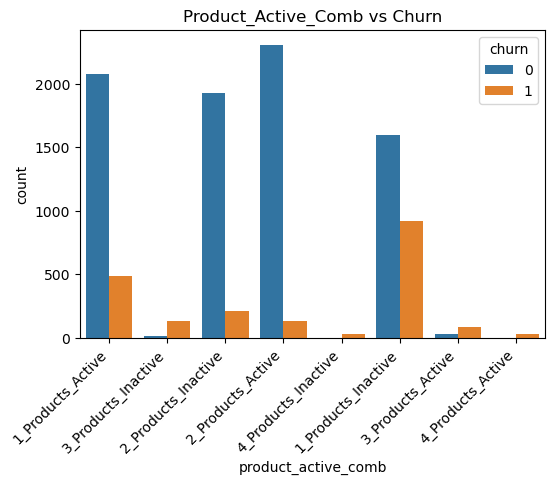

In [17]:
chi_square_test(ndf, feature='product_active_comb', save_plot=True, rotate_x=True)

- We can see that the most stable customers are the ones with 2 products both active and inactive.
- Customers with 3 or 4 products churn almost completely. This aligns with what was noticed during EDA (higher product count does not mean loylaty).
- Customers with 1 produtct churn more if they are inactive (almost 2x of customers with 1 products who are active).

## Testing two new feature interactions
1. Gender and Country

In [18]:
ndf['gender_country_comb'] = ndf['gender'] + '_' + ndf['country']


-- Chi-Square Test: gender_country_comb vs churn --
Contigency Table:
churn                   0    1
gender_country_comb           
Female_France        1801  460
Female_Germany        745  448
Female_Spain          858  231
Male_France          2403  350
Male_Germany          950  366
Male_Spain           1206  182

Chi-Square Statistic: 407.1139
P-Value: 0.0000
Decision: Reject H-0 (dependent)


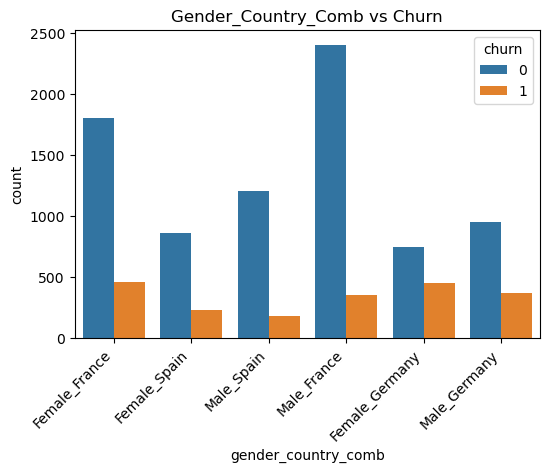

In [19]:
chi_square_test(ndf, feature='gender_country_comb', save_plot=True, rotate_x=True)

- It can be seen that german females have the highest churn rate.
- Both male and female german customers tend to churn more.
- The lowest churn rate can be seen in french and spanish males.

2. Credit Score and Age

In [20]:
def credit_band(score):
    if score < 500:
        return 'Low'
    elif score < 700:
        return 'Medium'
    else: 
        return 'High'
    

ndf['credit_group'] = ndf['credit_score'].apply(credit_band)
    

In [21]:
ndf['credit_age_comb'] = ndf['credit_group'] + '_' + ndf['age_group']


-- Chi-Square Test: credit_age_comb vs churn --
Contigency Table:
churn               0    1
credit_age_comb           
High_Middle      1820  404
High_Older        218  180
High_Young        486   40
Low_Middle        347   90
Low_Older          40   49
Low_Young          95   11
Medium_Middle    3581  856
Medium_Older      440  334
Medium_Young      936   73

Chi-Square Statistic: 641.8236
P-Value: 0.0000
Decision: Reject H-0 (dependent)


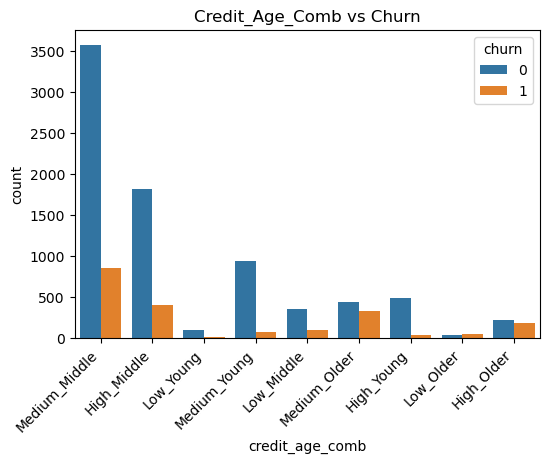

In [23]:
chi_square_test(ndf, feature='credit_age_comb', save_plot=True, rotate_x=True)

- Regardless of the credit score older customers churn more.
- Younger cutomers churn much less, even having low credit scores.
- Age seems more dominant than credit score.